----------------------------------------------------------------------------
# 1) 기술적 데이터 분석(DDA)
----------------------------------------------------------------------------

#### 1. 분석에 필요한 라이브러리 import

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
mpl.rc('font', family = 'Malgun Gothic')

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats  # 귀무가설

In [2]:
!pip install --user plotly
import plotly.express as px

In [3]:
# Jupyter Lab 명령어 미리보기

%config Completer.use_jedi = False

#### 2. 서울 상권 데이터 불러오기 및 데이터 타입 확인

In [4]:
df = pd.read_csv('상가(상권)정보_서울_202012.csv', encoding='utf-8',sep='|')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346577 entries, 0 to 346576
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     346577 non-null  int64  
 1   상호명        346576 non-null  object 
 2   지점명        58969 non-null   object 
 3   상권업종대분류코드  346577 non-null  object 
 4   상권업종대분류명   346577 non-null  object 
 5   상권업종중분류코드  346577 non-null  object 
 6   상권업종중분류명   346577 non-null  object 
 7   상권업종소분류코드  346577 non-null  object 
 8   상권업종소분류명   346577 non-null  object 
 9   표준산업분류코드   326327 non-null  object 
 10  표준산업분류명    326327 non-null  object 
 11  시도코드       346577 non-null  int64  
 12  시도명        346577 non-null  object 
 13  시군구코드      346577 non-null  int64  
 14  시군구명       346577 non-null  object 
 15  행정동코드      346577 non-null  int64  
 16  행정동명       346442 non-null  object 
 17  법정동코드      346577 non-null  int64  
 18  법정동명       346577 non-null  object 
 19  지번코드       346577 non-n

In [5]:
df.head(5)

상가업소번호        상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0  17163092  도전최강달인왕만두  NaN         Q       음식       Q01       한식    Q01A01   
1  17120456         이때  NaN         Q       음식       Q01       한식    Q01A01   
2  17175350      L.A.D  NaN         Q       음식       Q01       한식    Q01A01   
3  17175311    제이씨에스푸드  NaN         Q       음식       Q01       한식    Q01A01   
4  22767534     BYC상신점  상신점         D       소매       D05     의복의류    D05A07   

    상권업종소분류명 표준산업분류코드  ...                     건물관리번호     건물명  \
0  한식/백반/한정식   I56111  ...  1174010200102170000018014  고덕그라시움   
1  한식/백반/한정식   I56111  ...  1144012400103900067027687     NaN   
2  한식/백반/한정식   I56111  ...  1144012000103950112010755     NaN   
3  한식/백반/한정식   I56111  ...  1162010200101180033018722     NaN   
4   셔츠/내의/속옷      NaN  ...  1171011300100360000022458    성암빌딩   

                  도로명주소   구우편번호   신우편번호  동정보  층정보  호정보          경도         위도  
0     서울특별시 강동구 고덕로 333  134082  5224.0  NaN  NaN  NaN  127.159471  37.556197  
1   서울특별시 마포구 동교로38안길 7  121867  3982.0  NaN  NaN  NaN  126.924660  37.562176  
2  서울특별시 마포구 잔다리로3안길 23  121840  4043.0  NaN  NaN  NaN  126.919845  37.550689  
3    서울특별시 관악구 신림로14길 3  151856  8839.0  NaN  NaN  NaN  126.937790  37.471190  
4     서울특별시 송파구 오금로 527  138110  5768.0  NaN    1  NaN  127.147321  37.493054  

[5 rows x 39 columns]

#### 3. 데이터 사이즈 줄이기

In [6]:
# Data size줄이기 위한
# col 확인

df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
# 불필요한 데이터 삭제
# 필요 Data로 구성한 새로운 DataFame 생성

new_col = ['상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '상호명', '도로명주소', '시군구명', '행정동명']


df_new= df[new_col]
df_new

df_new.shape

(346577, 7)

#### 4. 결측치 제거

In [8]:
df_new.isnull().sum()

상권업종대분류명      0
상권업종중분류명      0
상권업종소분류명      0
상호명           1
도로명주소         0
시군구명          0
행정동명        135
dtype: int64

In [9]:
df_new1 = df_new.dropna(axis=0)

#### 5. 기술 통게량 확인

In [10]:
df_new1.describe()

상권업종대분류명 상권업종중분류명   상권업종소분류명     상호명             도로명주소    시군구명    행정동명
count    346441   346441     346441  346441            346441  346441  346441
unique        8       93        669  239518            123770      25     424
top          음식       한식  한식/백반/한정식      CU  서울특별시 종로구 종로 266     강남구    역삼1동
freq     135761    44649      32573    1925               895   37482    7589

----------------------------------------------------------------------------
# 2) 탐색적 데이터 분석(EDA)
----------------------------------------------------------------------------

In [11]:
df_new1['시군구명'].value_counts().sort_values(ascending=False)

강남구     37482
서초구     20317
송파구     18673
중구      16936
강서구     16674
광진구     16530
영등포구    16262
마포구     14869
강동구     14349
종로구     13883
동대문구    13718
관악구     13551
은평구     12647
구로구     11855
성북구     11844
용산구     11543
노원구     11450
양천구     10610
중랑구     10450
서대문구     9940
성동구      9531
금천구      8936
동작구      8692
도봉구      7929
강북구      7770
Name: 시군구명, dtype: int64

In [12]:
df_gu = df_new1['시군구명'].value_counts().sort_values(ascending=False).index.tolist()

In [13]:
print(df_gu, len(df_gu))

['강남구', '서초구', '송파구', '중구', '강서구', '광진구', '영등포구', '마포구', '강동구', '종로구', '동대문구', '관악구', '은평구', '구로구', '성북구', '용산구', '노원구', '양천구', '중랑구', '서대문구', '성동구', '금천구', '동작구', '도봉구', '강북구'] 25


In [14]:
print(df_gu[0], df_gu[12], df_gu[24])

강남구 은평구 강북구


----------------------------------------------
### 서울시 25개 구 지역에서 자영업 유치량을 조사한 결과 [강남구] 37482개로 가장 높고, [은평구] 12647개로 중간, [강북구]가 7770개로 가장 낮았다.
### 이를 토대로 서울시 25개 구 중 강남, 은평, 강북 3개의 데이터에 따라 지역별 업종 차이를 알아보려고 한다.
----------------------------------------------

## **1. 강남구**

#### 강남ㅇ

강남구 업종별 best 순위 ['음식', '소매', '생활서비스', '학문/교육', '부동산', '관광/여가/오락', '숙박', '스포츠']


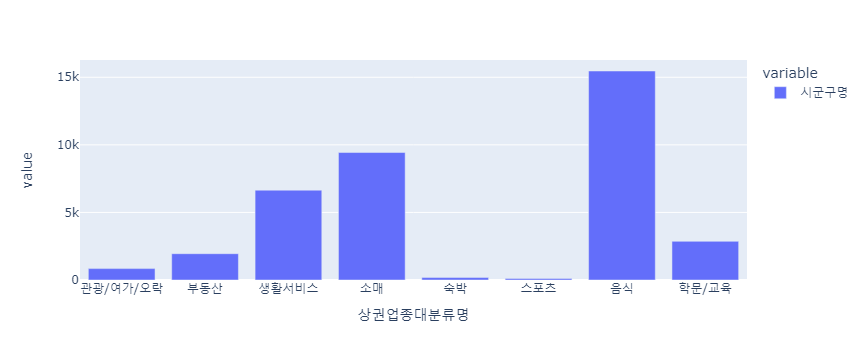

In [15]:
cond1 = df_new1['시군구명']=='강남구'

df_gangnam =df_new1[cond1]


p_1=df_gangnam['상권업종대분류명'].value_counts().sort_values(ascending=False)
print('강남구 업종별 best 순위',p_1.index.tolist())

p1 = df_gangnam.pivot_table(index='상권업종대분류명', values='시군구명', aggfunc='count')
#p1

px.bar(p1)

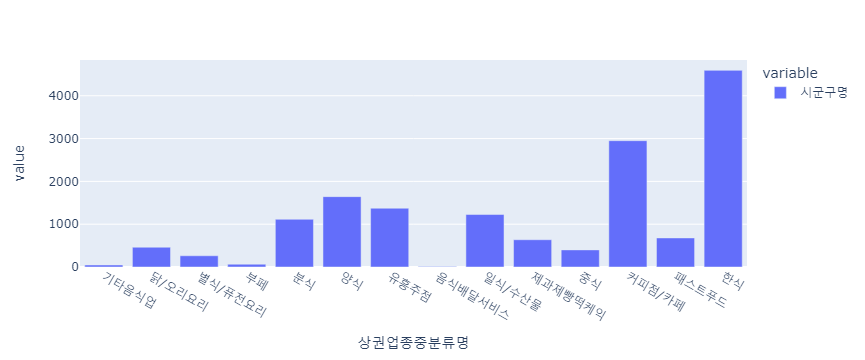

In [16]:
cond1 = df_gangnam['상권업종대분류명']=='음식'
df_food =df_gangnam[cond1]

#p_1=df_food['상권업종중분류명'].value_counts().sort_values(ascending=False)

p1 = df_food.pivot_table(index='상권업종중분류명', values='시군구명', aggfunc='count')
p1

px.bar(p1)

In [17]:
food_top5_g = df_food['상권업종소분류명'].value_counts().sort_values(ascending=False).head(5)
food_top5_g


# cond0=df_food['상권업종소분류명']==food_top10

한식/백반/한정식      3565
커피전문점/카페/다방    2891
정통양식/경양식       1272
라면김밥분식          722
음식점-일식          642
Name: 상권업종소분류명, dtype: int64

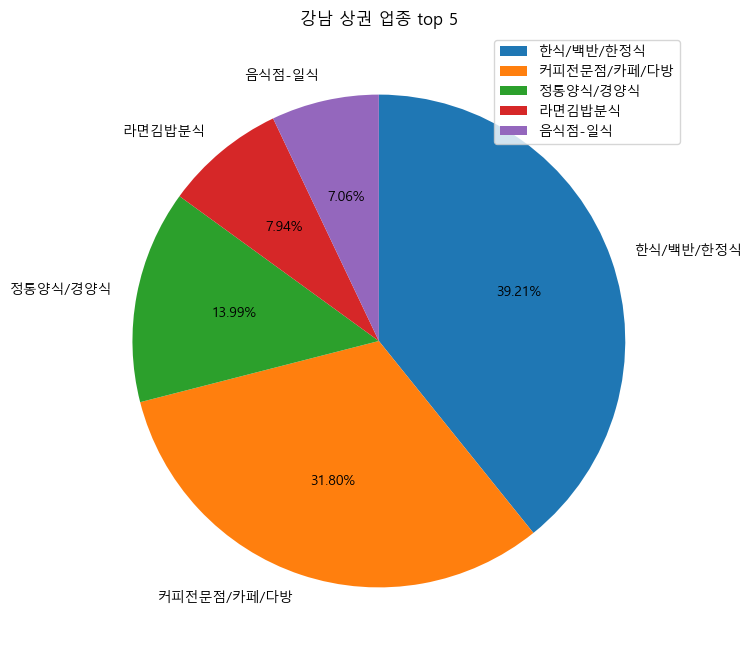

In [18]:
import matplotlib.pyplot as plt

# create data: an array of values
g_size_of_groups = food_top5_g.values.tolist()
labels = food_top5_g.index.tolist()

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정

ax = fig.add_subplot() ## 프레임 생성


# Create a pieplot
ax.pie(g_size_of_groups, labels=labels,
       startangle=90,                            ## 시작점을 90도(degree)로 지정
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p))

plt.legend() ## 범례 표시
plt.title('강남 상권 업종 top 5')
plt.show()

In [19]:
cond1 = df_gangnam['상권업종소분류명']=='한식/백반/한정식'
df_k_food1 =df_gangnam[cond1]
df_k_food1

df_dong1 = df_k_food1.pivot_table(index='행정동명', values= '상권업종소분류명',
                       aggfunc='count').sort_values(by='상권업종소분류명',ascending=False)
df_dong1[0:3]



상권업종소분류명
행정동명          
역삼1동       806
논현2동       367
논현1동       302

In [20]:
#### 3.5 역삼1동/ top5 인기 업종

In [21]:
cond1 = df_gangnam['행정동명']=='역삼1동'
df_YS1 =df_gangnam[cond1]
YS1=df_YS1['상권업종소분류명'].value_counts()[0:5]

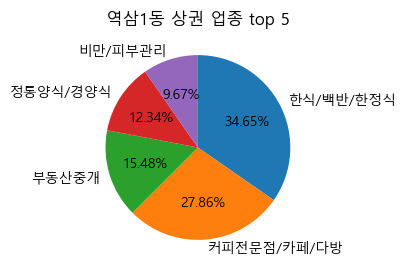

In [22]:
import matplotlib.pyplot as plt

# create data: an array of values

YS1_size_of_groups = YS1.values.tolist()
labels = YS1.index.tolist()

fig = plt.figure(figsize=(3,3)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정

ax = fig.add_subplot() ## 프레임 생성


# Create a pieplot
ax.pie(YS1, labels=labels,
       startangle=90,                            ## 시작점을 90도(degree)로 지정
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p))


plt.title('역삼1동 상권 업종 top 5')
plt.show()

In [23]:
#### 3.6 논현2동 top5 인기 업종

In [24]:
cond2 = df_gangnam['행정동명']=='논현2동'
df_NH2 =df_gangnam[cond2]
NH2 = df_NH2['상권업종소분류명'].value_counts()[0:5]

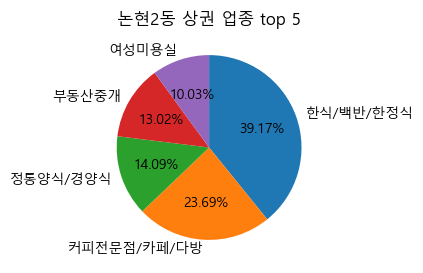

In [25]:
NH2_size_of_groups = NH2.values.tolist()
labels = NH2.index.tolist()

fig = plt.figure(figsize=(3,3)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정

ax = fig.add_subplot() ## 프레임 생성


# Create a pieplot
ax.pie(NH2, labels=labels,
       startangle=90,                            ## 시작점을 90도(degree)로 지정
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p))


plt.title('논현2동 상권 업종 top 5')
plt.show()



In [26]:
#### 3.7 논현1동 top5 인기 업종

In [27]:
cond3 = df_gangnam['행정동명']=='논현1동'
df_NH1 =df_gangnam[cond3]
NH1 = df_NH1['상권업종소분류명'].value_counts()[0:5]

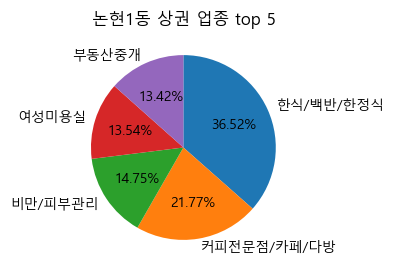

In [28]:
NH1_size_of_groups = NH1.values.tolist()
labels = NH1.index.tolist()

fig = plt.figure(figsize=(3,3)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정

ax = fig.add_subplot() ## 프레임 생성


# Create a pieplot
ax.pie(NH1, labels=labels,
       startangle=90,                            ## 시작점을 90도(degree)로 지정
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p))


plt.title('논현1동 상권 업종 top 5')
plt.show()

## **2. 은평구**

은평구 업종별 best 순위 ['음식', '소매', '생활서비스', '학문/교육', '부동산', '관광/여가/오락', '숙박', '스포츠']


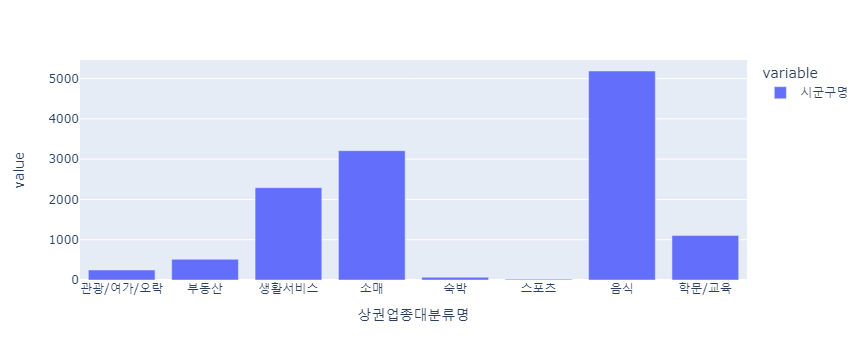

In [29]:
cond2 = df_new1['시군구명']=='은평구'

df_eunpyong =df_new1[cond2]


p_2=df_eunpyong['상권업종대분류명'].value_counts().sort_values(ascending=False)
print('은평구 업종별 best 순위',p_2.index.tolist())

p2 = df_eunpyong.pivot_table(index='상권업종대분류명', values='시군구명', aggfunc='count')


px.bar(p2)

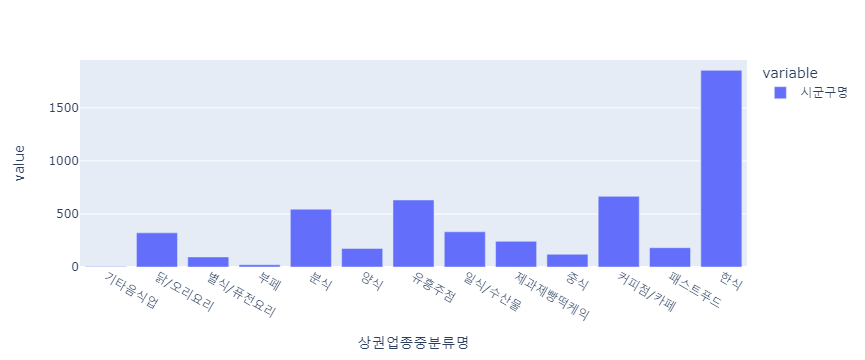

In [30]:
cond2 = df_eunpyong['상권업종대분류명']=='음식'
df_food2 =df_eunpyong[cond2]

#p_2=df_food2['상권업종중분류명'].value_counts().sort_values(ascending=False)


p2 = df_food2.pivot_table(index='상권업종중분류명', values='시군구명', aggfunc='count')
p2

px.bar(p2)

In [31]:
food_top5_e = df_food2['상권업종소분류명'].value_counts().sort_values(ascending=False).head(5)
food_top5_e

한식/백반/한정식      1376
커피전문점/카페/다방     655
호프/맥주           376
라면김밥분식          310
후라이드/양념치킨       260
Name: 상권업종소분류명, dtype: int64

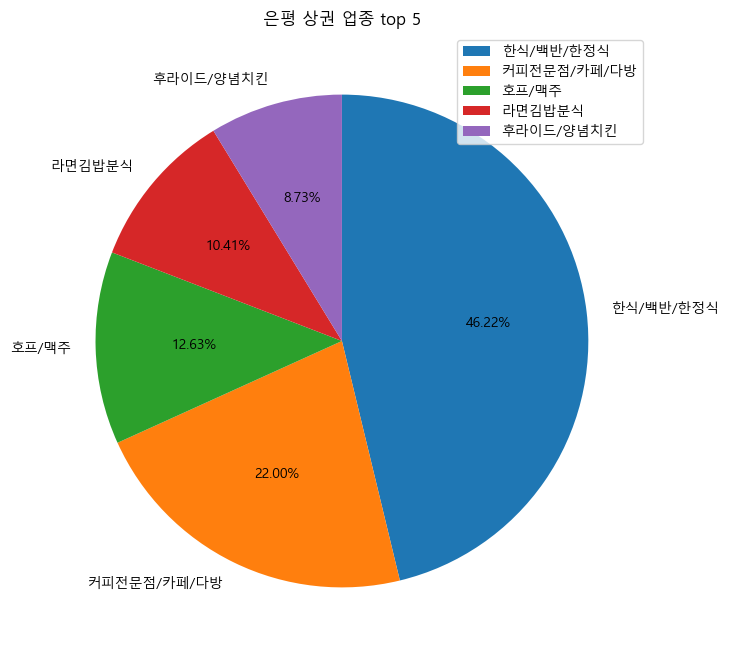

In [32]:
import matplotlib.pyplot as plt

# create data: an array of values
e_size_of_groups = food_top5_e.values.tolist()
labels = food_top5_e.index.tolist()

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정

ax = fig.add_subplot() ## 프레임 생성


# Create a pieplot
ax.pie(e_size_of_groups, labels=labels,
       startangle=90,                            ## 시작점을 90도(degree)로 지정
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p))

plt.legend() ## 범례 표시
plt.title('은평 상권 업종 top 5')
plt.show()

In [33]:
cond2 = df_eunpyong['상권업종소분류명']=='한식/백반/한정식'
df_k_food2 =df_eunpyong[cond2]
df_k_food2

df_dong2 = df_k_food2.pivot_table(index='행정동명', values= '상권업종소분류명',
                       aggfunc='count').sort_values(by='상권업종소분류명',ascending=False)
df_dong2[0:3]

상권업종소분류명
행정동명          
대조동        152
진관동        138
갈현2동       137

In [34]:
#### 2.5 대조동 top5 인기 업종

In [35]:
cond3 = df_eunpyong['행정동명']=='대조동'
df_DJ =df_eunpyong[cond3]
DJ=df_DJ['상권업종소분류명'].value_counts()[0:5]
DJ

한식/백반/한정식      152
여성미용실           74
커피전문점/카페/다방     54
부동산중개           44
라면김밥분식          35
Name: 상권업종소분류명, dtype: int64

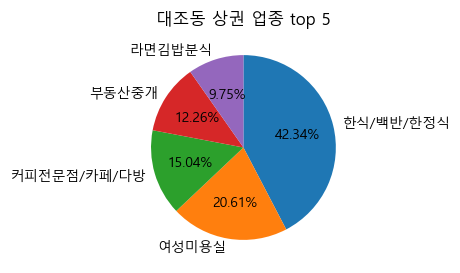

In [36]:
DJ_size_of_groups = DJ.values.tolist()
labels = DJ.index.tolist()

fig = plt.figure(figsize=(3,3)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정

ax = fig.add_subplot() ## 프레임 생성


# Create a pieplot
ax.pie(DJ, labels=labels,
       startangle=90,                            ## 시작점을 90도(degree)로 지정
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p))


plt.title('대조동 상권 업종 top 5')
plt.show()

In [37]:
#### 2.6 진관동 top5 인기 업종

In [38]:
cond3 = df_eunpyong['행정동명']=='진관동'
df_JG =df_eunpyong[cond3]
JG=df_JG['상권업종소분류명'].value_counts()[0:5]
JG

한식/백반/한정식      138
커피전문점/카페/다방    103
부동산중개           82
여성미용실           70
편의점             49
Name: 상권업종소분류명, dtype: int64

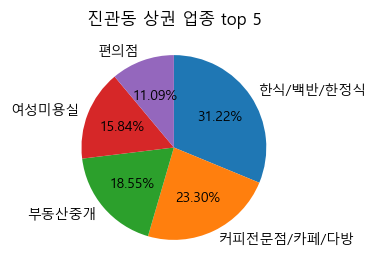

In [39]:
JG_size_of_groups = JG.values.tolist()
labels = JG.index.tolist()

fig = plt.figure(figsize=(3,3)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정

ax = fig.add_subplot() ## 프레임 생성


# Create a pieplot
ax.pie(JG, labels=labels,
       startangle=90,                            ## 시작점을 90도(degree)로 지정
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p))


plt.title('진관동 상권 업종 top 5')
plt.show()

In [40]:
#### 2.7 갈현2동 top5 인기 업종

In [41]:
cond3 = df_eunpyong['행정동명']=='갈현2동'
df_GH =df_eunpyong[cond3]
GH=df_GH['상권업종소분류명'].value_counts()[0:5]
GH

한식/백반/한정식      137
여성미용실           92
커피전문점/카페/다방     65
일반의류            46
편의점             37
Name: 상권업종소분류명, dtype: int64

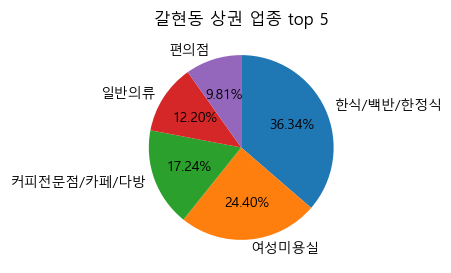

In [42]:
GH_size_of_groups = GH.values.tolist()
labels = GH.index.tolist()

fig = plt.figure(figsize=(3,3)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정

ax = fig.add_subplot() ## 프레임 생성


# Create a pieplot
ax.pie(GH, labels=labels,
       startangle=90,                            ## 시작점을 90도(degree)로 지정
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p))


plt.title('갈현동 상권 업종 top 5')
plt.show()

## **3. 강북구**

#### 3.1 강북구 상권 업종 분석

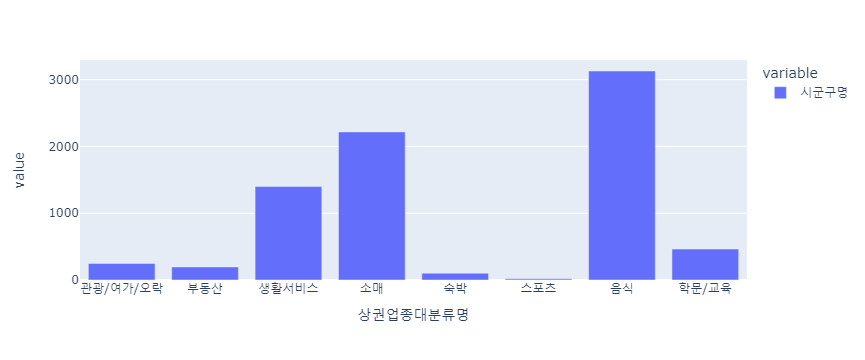

In [43]:
cond3 = df_new1['시군구명']=='강북구'

df_gangbook =df_new1[cond3]


#p3=df_gangbook['상권업종대분류명'].value_counts().sort_values(ascending=False)

p3 = df_gangbook.pivot_table(index='상권업종대분류명', values='시군구명', aggfunc='count')

px.bar(p3)

#### 3.2 강북구 인기 요식업 분석

강북구 요식업 best 순위 ['한식', '유흥주점', '커피점/카페', '분식', '닭/오리요리', '일식/수산물', '패스트푸드', '제과제빵떡케익', '양식', '별식/퓨전요리', '중식', '부페', '음식배달서비스', '기타음식업']


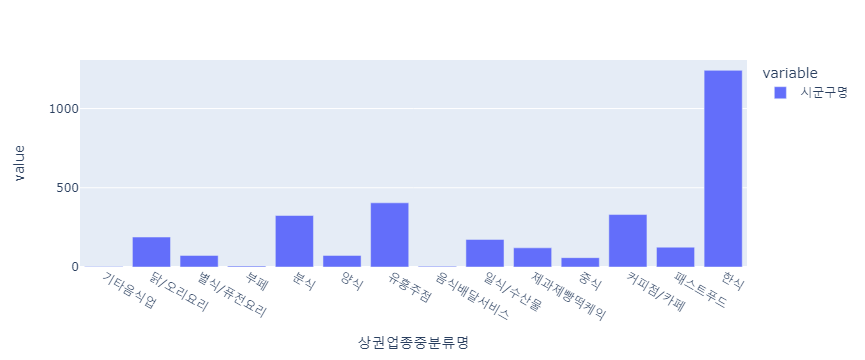

In [44]:
cond3 = df_gangbook['상권업종대분류명']=='음식'
df_food3 =df_gangbook[cond3]

p_3=df_food3['상권업종중분류명'].value_counts().sort_values(ascending=False)
print('강북구 요식업 best 순위',p_3.index.tolist())

p3 = df_food3.pivot_table(index='상권업종중분류명', values='시군구명', aggfunc='count')
p3

px.bar(p3)

#### 3.3 강북구 상권 업종 top5

In [45]:
food_top5_b = df_food3['상권업종소분류명'].value_counts().sort_values(ascending=False).head(5)
food_top5_b

한식/백반/한정식      835
커피전문점/카페/다방    326
호프/맥주          229
라면김밥분식         198
후라이드/양념치킨      141
Name: 상권업종소분류명, dtype: int64

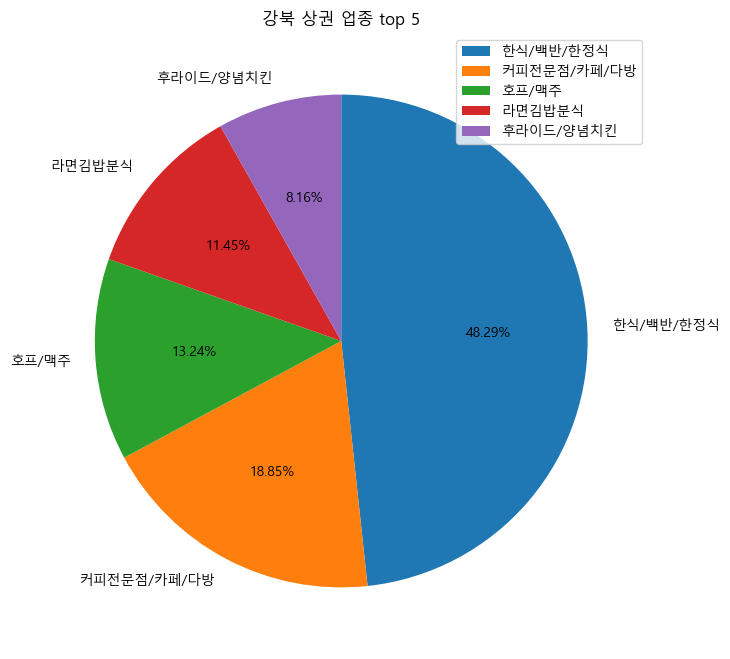

In [46]:
import matplotlib.pyplot as plt

# create data: an array of values
b_size_of_groups = food_top5_b.values.tolist()
labels = food_top5_b.index.tolist()

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정

ax = fig.add_subplot() ## 프레임 생성


# Create a pieplot
ax.pie(b_size_of_groups, labels=labels,
       startangle=90,                            ## 시작점을 90도(degree)로 지정
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p))

plt.legend() ## 범례 표시
plt.title('강북 상권 업종 top 5')
plt.show()

#### 3.4 강북구 한식/백반/한정식 상권 발달 행정동 top3 분석

In [47]:
cond3 = df_gangbook['상권업종소분류명']=='한식/백반/한정식'
df_k_food3 =df_gangbook[cond3]
df_k_food3

df_dong3 = df_k_food3.pivot_table(index='행정동명', values= '상권업종소분류명',
                       aggfunc='count').sort_values(by='상권업종소분류명',ascending=False)
df_dong3[0:3]

상권업종소분류명
행정동명          
수유3동       116
우이동        115
송중동        113

#### 3.5 수유3동 top5 인기 업종

In [48]:
cond3 = df_gangbook['행정동명']=='수유3동'
df_SY3 =df_gangbook[cond3]
SY3=df_SY3['상권업종소분류명'].value_counts()[0:5]
SY3

한식/백반/한정식      116
여성미용실           54
호프/맥주           45
커피전문점/카페/다방     43
노래방             38
Name: 상권업종소분류명, dtype: int64

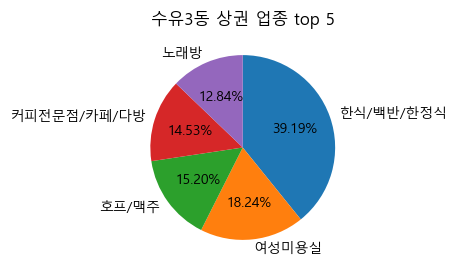

In [49]:
import matplotlib.pyplot as plt

# create data: an array of values
SY3_size_of_groups = SY3.values.tolist()
labels = SY3.index.tolist()

fig = plt.figure(figsize=(3,3)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정

ax = fig.add_subplot() ## 프레임 생성


# Create a pieplot
ax.pie(SY3, labels=labels,
       startangle=90,                            ## 시작점을 90도(degree)로 지정
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p))

plt.title('수유3동 상권 업종 top 5')
plt.show()

#### 3.6 우이동 top5 인기 업종

In [50]:
cond3 = df_gangbook['행정동명']=='우이동'
df_UE =df_gangbook[cond3]
UE=df_UE['상권업종소분류명'].value_counts()[0:5]
UE

한식/백반/한정식      115
커피전문점/카페/다방     40
여성미용실           29
편의점             18
후라이드/양념치킨       16
Name: 상권업종소분류명, dtype: int64

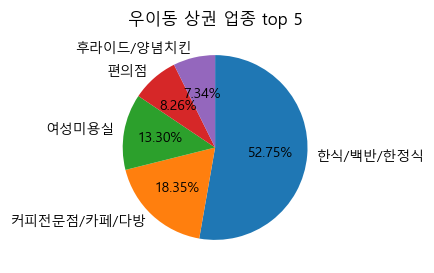

In [51]:
import matplotlib.pyplot as plt

# create data: an array of values
UE_size_of_groups = UE.values.tolist()
labels = UE.index.tolist()

fig = plt.figure(figsize=(3,3)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정

ax = fig.add_subplot() ## 프레임 생성


# Create a pieplot
ax.pie(UE, labels=labels,
       startangle=90,                            ## 시작점을 90도(degree)로 지정
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p))

plt.title('우이동 상권 업종 top 5')
plt.show()

#### 3.7 송중동 top5 인기 업종

In [52]:
cond3 = df_gangbook['행정동명']=='송중동'
df_SG =df_gangbook[cond3]
SG=df_SG['상권업종소분류명'].value_counts()[0:5]
SG

한식/백반/한정식      113
여성미용실           75
커피전문점/카페/다방     53
호프/맥주           44
편의점             31
Name: 상권업종소분류명, dtype: int64

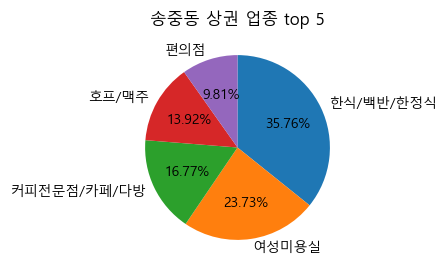

In [53]:
import matplotlib.pyplot as plt

# create data: an array of values
SG_size_of_groups = SG.values.tolist()
labels = SG.index.tolist()

fig = plt.figure(figsize=(3,3)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정

ax = fig.add_subplot() ## 프레임 생성


# Create a pieplot
ax.pie(SG, labels=labels,
       startangle=90,                            ## 시작점을 90도(degree)로 지정
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p))

plt.title('송중동 상권 업종 top 5')
plt.show()

-------------------------------------
# insight 3)

## 위 과정을 통해 서울시 강북구에서